# Removing contours from an image using Python and OpenCV

[SOURCE](https://www.pyimagesearch.com/2015/02/09/removing-contours-image-using-python-opencv/)



Awhile back I was going through /r/computervision when I stumbled across a question asking how to remove contours from an image using OpenCV.

Intrigued, I posted a reply. The basic algorithm for removing contours from an image goes something like this:

```
Step 1: Detect and find contours in your image.
Step 2: Loop over contours individually.
Step 3: Determine if the contour is “bad” and should be removed according to some criterion.
Step 4: Accumulate a mask of “bad” contours to be removed.
Step 5: Apply the accumulated mask of bad contours to the original image using a bitwise ‘and’.
```

In [2]:
%matplotlib widget
# SOURCE for this project is: https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/
# https://colab.research.google.com/drive/1tdkpKPjUtj_Aq8ponvzd8H4dx1-fSRkv?usp=sharing#scrollTo=Wk5I4XJH5z_x


# Get images from here: https://www.cs.cmu.edu/afs/cs/project/vision/vasc/idb/www/html/face/

In [4]:


# USAGE
# python non-maximum-suppression-case-study.py --image ../images/beach.png
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html

import os
import argparse
import pathlib
from typing import Union, Any

from PIL import Image
from IPython.display import display

import mahotas
import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt
from skimage.transform import pyramid_gaussian
import better_exceptions
better_exceptions.MAX_LENGTH = None
# better_exceptions.hook()

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/screenshots/IMG_4725.PNG").resolve()
args["scale"] = 1.5

assert args["image"].exists()

# SOURCE: http://engineering.curalate.com/2017/04/13/content-based-intelligent-cropping.html
def showImage(img):
    temp_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

    # SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
    display(Image.fromarray(temp_image))

image: Union[np.ndarray, Any]
image = cv2.imread(f"{args['image']}")
image = imutils.resize(image, width=500)

def plt_imshow(title, img):
    # convert the image frame BGR to RGB color space and display it
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.grid(False)
    plt.show()

try:
    xrange
except NameError:
    xrange = range



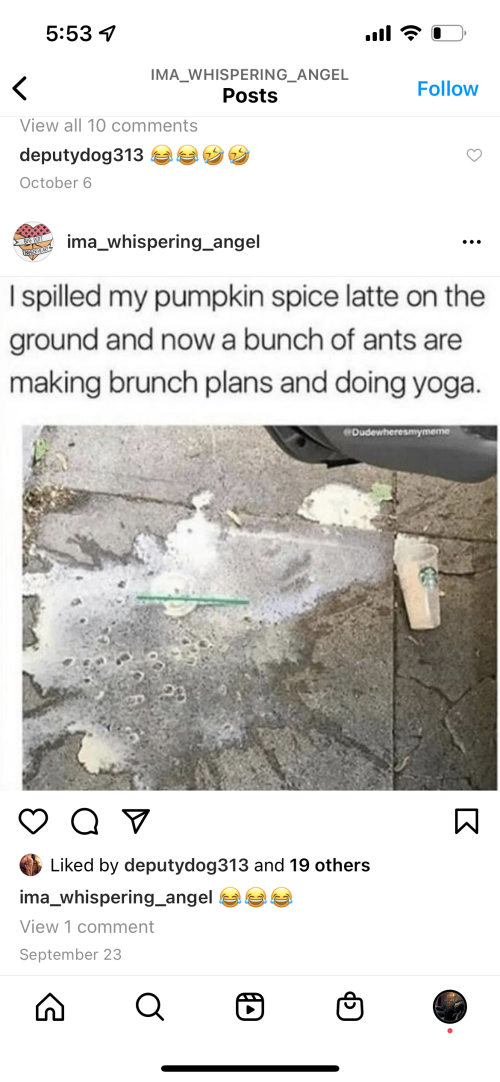

In [6]:
# plt_imshow("Original", image)
showImage(image)

In [8]:
# 	cv.arcLength(	curve, closed	) ->	retval
# SOURCE: https://docs.opencv.org/4.5.3/d3/dc0/group__imgproc__shape.html#ga8d26483c636be6b35c3ec6335798a47c

In [10]:
# Removing contours from an image using Python and OpenCV
# remove_contours.py
# NOTE: Remember, in our toy example image above, our goal is to remove the circles/ellipses, while keeping the rectangles intact.
def is_contour_bad(contour):
    # ------------------------
    # approximate the contour
    # NOTE: Contour Perimeter (https://docs.opencv.org/4.5.3/dd/d49/tutorial_py_contour_features.html)
    # It is also called arc length. 
    # It can be found out using cv.arcLength() function. 
    # Second argument specify whether shape is a closed contour (if passed True), or just a curve.
    contour_perimeter = cv2.arcLength(contour, True)
    # ------------------------
    
    # ------------------------
    # 4. Contour Approximation
    # It approximates a contour shape to another shape with less 
    # number of vertices depending upon the precision we specify. 
    # It is an implementation of Douglas-Peucker algorithm. 
    # Check the wikipedia page for algorithm and demonstration.
    # To understand this, 
    # suppose you are trying to find a square in an image, 
    # but due to some problems in the image, 
    # you didn't get a perfect square, 
    # but a "bad shape" (As shown in first image below). 
    # Now you can use this function to approximate the shape. 
    # In this, second argument is called epsilon, 
    # which is maximum distance from contour to approximated contour. 
    # It is an accuracy parameter. 
    # A wise selection of epsilon is needed to get the correct output.
    epsilon = 0.02 * contour_perimeter
    approx = cv2.approxPolyDP(contour, epsilon, True)
    # ------------------------
    # the contour is 'bad' if it is not a rectangle
    # 4 represents the number of points, or vertices in the contour
    return not len(approx) == 4


In [76]:
# load the shapes image, convert it to grayscale, and edge edges in
# the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# lets apply a blur first before moving forward
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

# When performing Canny edge detection we need two values
# for hysteresis: threshold1 and threshold2. Any gradient
# value larger than threshold2 are considered to be an
# edge. Any value below threshold1 are considered not to
# ben an edge. Values in between threshold1 and threshold2
# are either classified as edges or non-edges based on how
# the intensities are "connected". In this case, any gradient
# values below 30 are considered non-edges whereas any value
# above 150 are considered edges.
edged = cv2.Canny(blurred, 50, 100)

# find contours in the image and initialize the mask that will be
# used to remove the bad contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
mask = np.ones(image.shape[:2], dtype="uint8") * 255

# # loop over the contours
# for c in cnts:
#     # if the contour is bad, draw it on the mask
#     if is_contour_bad(c):
#         cv2.drawContours(mask, [c], -1, 0, -1)

# # remove the contours from the image and show the resulting images
# result_image = cv2.bitwise_and(image, image, mask=mask)

blurred - show image with glassian blur


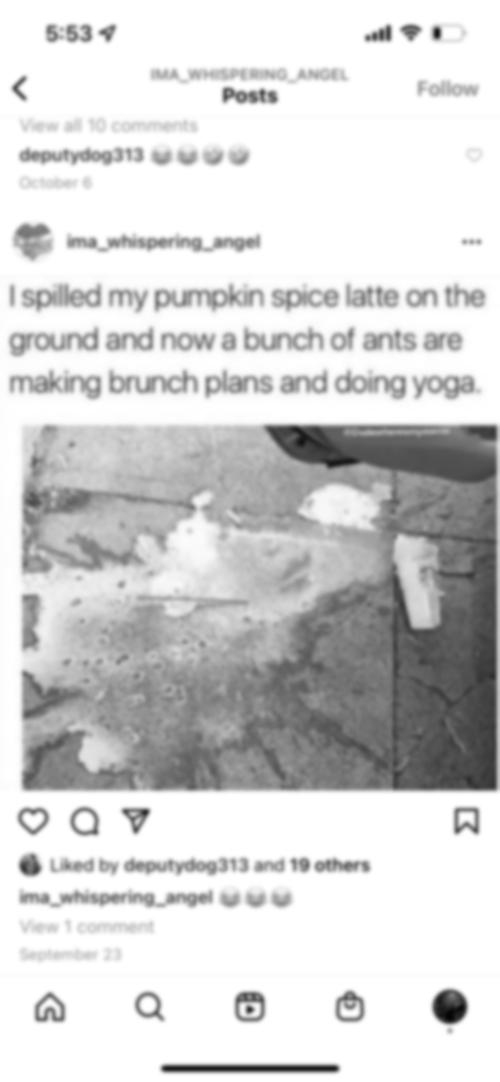

In [84]:
print("blurred - show image with glassian blur")
showImage(blurred)

edged - show all the edges of of the image


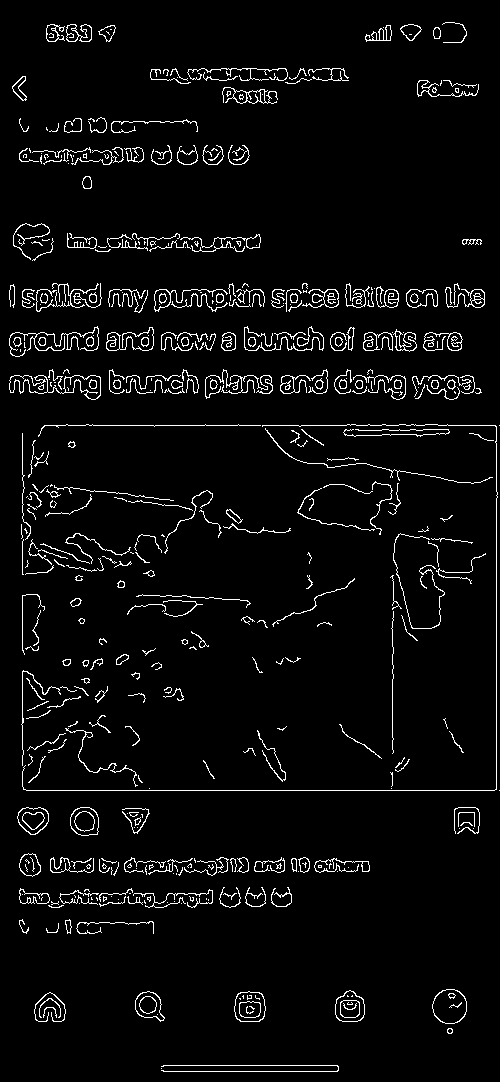

In [88]:
print("edged - show all the edges of of the image")
showImage(edged)

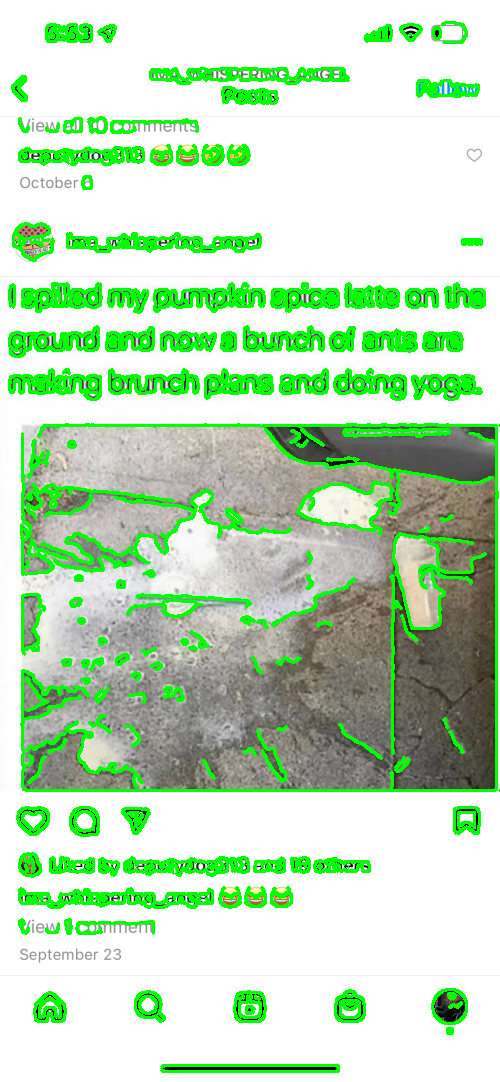

In [92]:
# Let's highlight the coins in the original image by drawing a
# green circle around them
screenshot_with_contours = image.copy()
# -1 = find all of them
# (0, 255, 0) = green
# 2 = thickness
cv2.drawContours(screenshot_with_contours, cnts, -1, (0, 255, 0), 2)

# count = 0
# # loop over the contours
# for c in cnts:
#     # if the contour is bad, draw it on the mask
#     print(f"contour # {count}")
#     showImage(c)
#     count = count + 1
showImage(screenshot_with_contours)

In [96]:
def print_all_contours(cnts):
    # Now, let's loop over each contour
    for (i, c) in enumerate(cnts):
        # We can compute the 'bounding box' for each contour, which is
        # the rectangle that encloses the contour
        (x, y, w, h) = cv2.boundingRect(c)

        # Now that we have the contour, let's extract it using array
        # slices
        print("Contour #{}".format(i + 1))
        temp_contour = image[y : y + h, x : x + w]
        display(Image.fromarray(temp_contour))

        # # Just for fun, let's construct a mask for the coin by finding
        # # The minumum enclosing circle of the contour
        # temp_mask = np.zeros(image.shape[:2], dtype="uint8")
        # ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
        # cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
        # mask = mask[y : y + h, x : x + w]


Contour #1


Contour #2


Contour #3


Contour #4


Contour #5


Contour #6


Contour #7


Contour #8


Contour #9


Contour #10


Contour #11


Contour #12


Contour #13


Contour #14


Contour #15


Contour #16


Contour #17


Contour #18


Contour #19


Contour #20


Contour #21


Contour #22


Contour #23


Contour #24


Contour #25


Contour #26


Contour #27


Contour #28


Contour #29


Contour #30


Contour #31


Contour #32


Contour #33


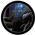

Contour #34


Contour #35


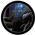

Contour #36


Contour #37


Contour #38


Contour #39


Contour #40


Contour #41


Contour #42


Contour #43


Contour #44


Contour #45


Contour #46


Contour #47


Contour #48


Contour #49


Contour #50


Contour #51


Contour #52


Contour #53


Contour #54


Contour #55


Contour #56


Contour #57


Contour #58


Contour #59


Contour #60


Contour #61


Contour #62


Contour #63


Contour #64


Contour #65


Contour #66


Contour #67


Contour #68


Contour #69


Contour #70


Contour #71


Contour #72


Contour #73


Contour #74


Contour #75


Contour #76


Contour #77


Contour #78


Contour #79


Contour #80


Contour #81


Contour #82


Contour #83


Contour #84


Contour #85


Contour #86


Contour #87


Contour #88


Contour #89


Contour #90


Contour #91


Contour #92


Contour #93


Contour #94


Contour #95


Contour #96


Contour #97


Contour #98


Contour #99


Contour #100


Contour #101


Contour #102


Contour #103


Contour #104


Contour #105


Contour #106


Contour #107


Contour #108


Contour #109


Contour #110


Contour #111


Contour #112


Contour #113


Contour #114


Contour #115


Contour #116


Contour #117


Contour #118


Contour #119


Contour #120


Contour #121


Contour #122


Contour #123


Contour #124


Contour #125


Contour #126


Contour #127


Contour #128


Contour #129


Contour #130


Contour #131


Contour #132


Contour #133


Contour #134


Contour #135


Contour #136


Contour #137


Contour #138


Contour #139


Contour #140


Contour #141


Contour #142


Contour #143


Contour #144


Contour #145


Contour #146


Contour #147


Contour #148


Contour #149


Contour #150


Contour #151


Contour #152


Contour #153


Contour #154


Contour #155


Contour #156


Contour #157


Contour #158


Contour #159


Contour #160


Contour #161


Contour #162


Contour #163


Contour #164


Contour #165


Contour #166


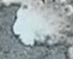

Contour #167


Contour #168


Contour #169


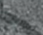

Contour #170


Contour #171


Contour #172


Contour #173


Contour #174


Contour #175


Contour #176


Contour #177


Contour #178


Contour #179


Contour #180


Contour #181


Contour #182


Contour #183


Contour #184


Contour #185


Contour #186


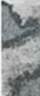

Contour #187


Contour #188


Contour #189


Contour #190


Contour #191


Contour #192


Contour #193


Contour #194


Contour #195


Contour #196


Contour #197


Contour #198


Contour #199


Contour #200


Contour #201


Contour #202


Contour #203


Contour #204


Contour #205


Contour #206


Contour #207


Contour #208


Contour #209


Contour #210


Contour #211


Contour #212


Contour #213


Contour #214


Contour #215


Contour #216


Contour #217


Contour #218


Contour #219


Contour #220


Contour #221


Contour #222


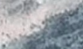

Contour #223


Contour #224


Contour #225


Contour #226


Contour #227


Contour #228


Contour #229


Contour #230


Contour #231


Contour #232


Contour #233


Contour #234


Contour #235


Contour #236


Contour #237


Contour #238


Contour #239


Contour #240


Contour #241


Contour #242


Contour #243


Contour #244


Contour #245


Contour #246


Contour #247


Contour #248


Contour #249


Contour #250


Contour #251


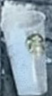

Contour #252


Contour #253


Contour #254


Contour #255


Contour #256


Contour #257


Contour #258


Contour #259


Contour #260


Contour #261


Contour #262


Contour #263


Contour #264


Contour #265


Contour #266


Contour #267


Contour #268


Contour #269


Contour #270


Contour #271


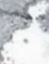

Contour #272


Contour #273


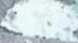

Contour #274


Contour #275


Contour #276


Contour #277


Contour #278


Contour #279


Contour #280


Contour #281


Contour #282


Contour #283


Contour #284


Contour #285


Contour #286


Contour #287


Contour #288


Contour #289


Contour #290


Contour #291


Contour #292


Contour #293


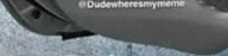

Contour #294


Contour #295


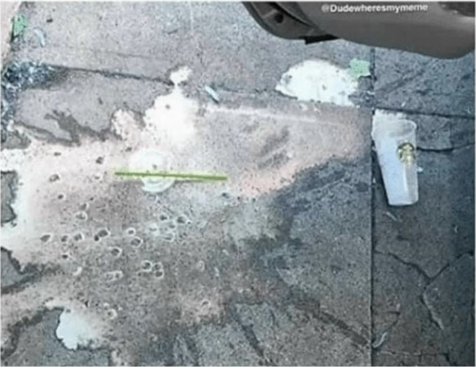

Contour #296


Contour #297


Contour #298


Contour #299


Contour #300


Contour #301


Contour #302


Contour #303


Contour #304


Contour #305


Contour #306


Contour #307


Contour #308


Contour #309


Contour #310


Contour #311


Contour #312


Contour #313


Contour #314


Contour #315


Contour #316


Contour #317


Contour #318


Contour #319


Contour #320


Contour #321


Contour #322


Contour #323


Contour #324


Contour #325


Contour #326


Contour #327


Contour #328


Contour #329


Contour #330


Contour #331


Contour #332


Contour #333


Contour #334


Contour #335


Contour #336


Contour #337


Contour #338


Contour #339


Contour #340


Contour #341


Contour #342


Contour #343


Contour #344


Contour #345


Contour #346


Contour #347


Contour #348


Contour #349


Contour #350


Contour #351


Contour #352


Contour #353


Contour #354


Contour #355


Contour #356


Contour #357


Contour #358


Contour #359


Contour #360


Contour #361


Contour #362


Contour #363


Contour #364


Contour #365


Contour #366


Contour #367


Contour #368


Contour #369


Contour #370


Contour #371


Contour #372


Contour #373


Contour #374


Contour #375


Contour #376


Contour #377


Contour #378


Contour #379


Contour #380


Contour #381


Contour #382


Contour #383


Contour #384


Contour #385


Contour #386


Contour #387


Contour #388


Contour #389


Contour #390


Contour #391


Contour #392


Contour #393


Contour #394


Contour #395


Contour #396


Contour #397


Contour #398


Contour #399


Contour #400


Contour #401


Contour #402


Contour #403


Contour #404


Contour #405


Contour #406


Contour #407


Contour #408


Contour #409


Contour #410


Contour #411


Contour #412


Contour #413


Contour #414


Contour #415


Contour #416


Contour #417


Contour #418


Contour #419


Contour #420


Contour #421


Contour #422


Contour #423


Contour #424


Contour #425


Contour #426


Contour #427


Contour #428


Contour #429


Contour #430


Contour #431


Contour #432


Contour #433


Contour #434


Contour #435


Contour #436


Contour #437


Contour #438


Contour #439


Contour #440


Contour #441


Contour #442


Contour #443


Contour #444


Contour #445


Contour #446


Contour #447


Contour #448


Contour #449


Contour #450


Contour #451


Contour #452


Contour #453


Contour #454


Contour #455


Contour #456


Contour #457


Contour #458


Contour #459


Contour #460


Contour #461


Contour #462


Contour #463


Contour #464


Contour #465


Contour #466


Contour #467


Contour #468


Contour #469


Contour #470


Contour #471


Contour #472


Contour #473


Contour #474


Contour #475


Contour #476


Contour #477


Contour #478


Contour #479


Contour #480


Contour #481


Contour #482


Contour #483


Contour #484


Contour #485


Contour #486


Contour #487


Contour #488


Contour #489


Contour #490


Contour #491


Contour #492


Contour #493


Contour #494


Contour #495


Contour #496


Contour #497


Contour #498


Contour #499


Contour #500


Contour #501


Contour #502


Contour #503


Contour #504


Contour #505


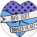

Contour #506


Contour #507


Contour #508


Contour #509


Contour #510


Contour #511


Contour #512


Contour #513


Contour #514


Contour #515


Contour #516


Contour #517


Contour #518


Contour #519


Contour #520


Contour #521


Contour #522


Contour #523


Contour #524


Contour #525


Contour #526


Contour #527


Contour #528


Contour #529


Contour #530


Contour #531


Contour #532


Contour #533


Contour #534


Contour #535


Contour #536


Contour #537


Contour #538


Contour #539


Contour #540


Contour #541


Contour #542


Contour #543


Contour #544


Contour #545


Contour #546


Contour #547


Contour #548


Contour #549


Contour #550


Contour #551


Contour #552


Contour #553


Contour #554


Contour #555


Contour #556


Contour #557


Contour #558


Contour #559


Contour #560


Contour #561


Contour #562


Contour #563


Contour #564


Contour #565


Contour #566


Contour #567


Contour #568


Contour #569


Contour #570


Contour #571


Contour #572


Contour #573


Contour #574


Contour #575


Contour #576


Contour #577


Contour #578


Contour #579


Contour #580


Contour #581


Contour #582


Contour #583


Contour #584


Contour #585


Contour #586


Contour #587


Contour #588


Contour #589


Contour #590


Contour #591


Contour #592


Contour #593


Contour #594


Contour #595


Contour #596


Contour #597


In [145]:
# UNCOMMENT THIS IF YOU NEED TO SEE ALL CONTOURS
print_all_contours(cnts)

In [104]:
contour_number = 594
# lets look at the first contour
(x, y, w, h) = cv2.boundingRect(cnts[contour_number])
temp_contour = image[y : y + h, x : x + w]
print(f"Contour #{contour_number}")
print("")
display(Image.fromarray(temp_contour))
print("")

Contour #594



In [108]:
# Now lets analyze the shape etc

# approximate the contour
peri: float
approx: np.ndarray

peri = cv2.arcLength(cnts[contour_number], True)
approx = cv2.approxPolyDP(cnts[contour_number], 0.02 * peri, True)
# the contour is 'bad' if it is not a rectangle
# return not len(approx) == 4

In [112]:
len(approx)

13

In [157]:
# find heart contour
# 147

# NOTE: We know this is at 147 due to our display_contours function
contour_number = 146
# lets look at the first contour
(x, y, w, h) = cv2.boundingRect(cnts[contour_number])
temp_contour = image[y : y + h, x : x + w]
print(f"Contour #{contour_number}")
print("")
display(Image.fromarray(temp_contour))
print("")

# Now lets analyze the shape etc

# approximate the contour
peri: float
approx: np.ndarray

peri = cv2.arcLength(cnts[contour_number], True)
approx = cv2.approxPolyDP(cnts[contour_number], 0.02 * peri, True)
len(approx)

Contour #146



8

Otsu's threshold: 192


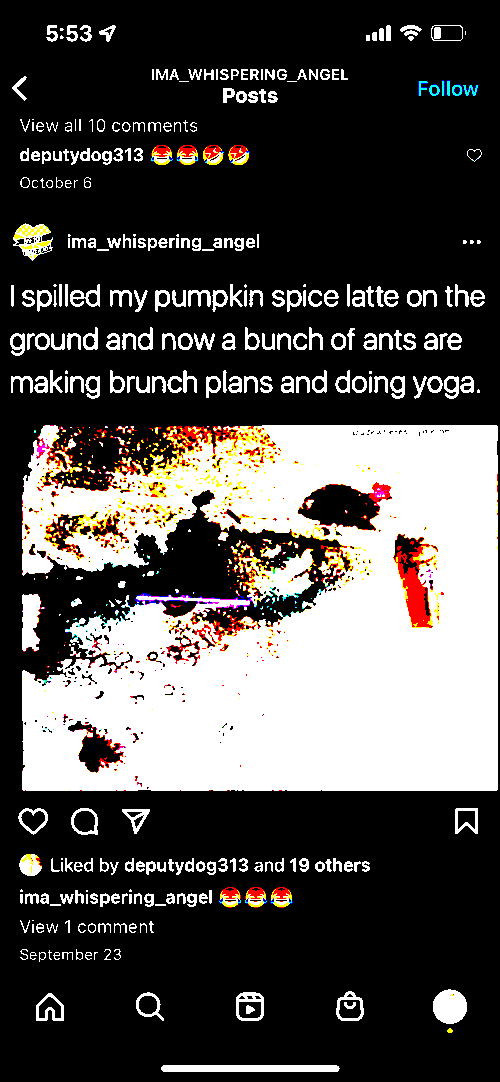

In [125]:
# Lets look at a threshold version of the pic

# OpenCV provides methods to use Otsu's thresholding, but I find
# the mahotas implementation is more 'Pythonic'. Otsu's method
# assumes that are two 'peaks' in the grayscale histogram. It finds
# these peaks, and then returns a value we should threshold on.
T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: {}".format(T))

# Applying the threshold can be done using NumPy, where values
# smaller than the threshold are set to zero, and values above
# the threshold are set to 255 (white).
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(thresh))

In [117]:
# # plt_imshow("Mask", mask)
# # plt_imshow("After", result_image)

# print("mask")
# showImage(mask)

In [121]:
# print("after")
# showImage(image)

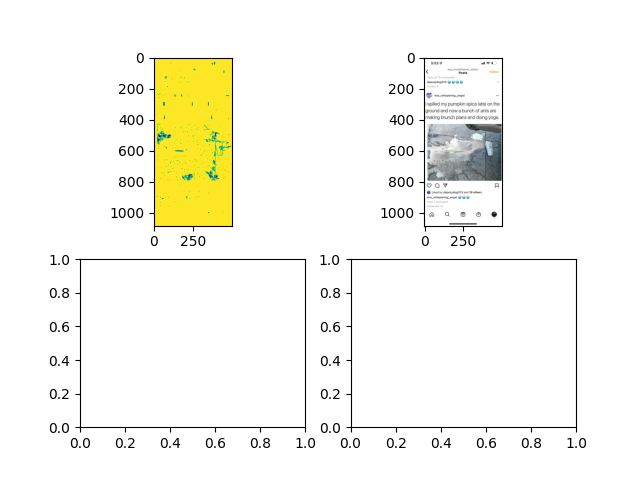

In [9]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mask)
axarr[0,1].imshow(image)
# axarr[1,0].imshow(image_datas[2])
# axarr[1,1].imshow(image_datas[3])

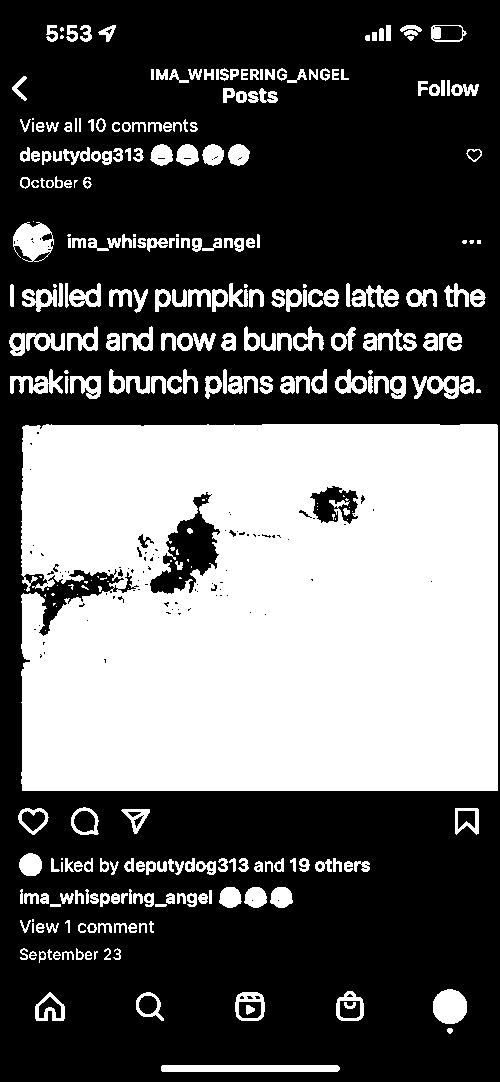

In [129]:
# How to crop an image from screenshot with the use of OpenCV?
# https://stackoverflow.com/questions/53942620/how-to-crop-an-image-from-screenshot-with-the-use-of-opencv
# One of the prominent feature in your snapshot images is the white background color. 
# Everything appears on top of it, even that user image. 
# So we will try to segment out the background which would leave us with smaller components such as Instagram icon, 
# likes, etc. 
# Then we will pick the largest element assuming that the user image is the 
# largest element present on the screen. 
# Then we will simply find the cv2.boundingRect() of the largest contour and crop the snapshot accordingly as:
img = image.copy()

white_lower = np.asarray([230, 230, 230])
white_upper = np.asarray([255, 255, 255])

crop_mask = cv2.inRange(img, white_lower, white_upper)
crop_mask = cv2.bitwise_not(crop_mask)

showImage(crop_mask)

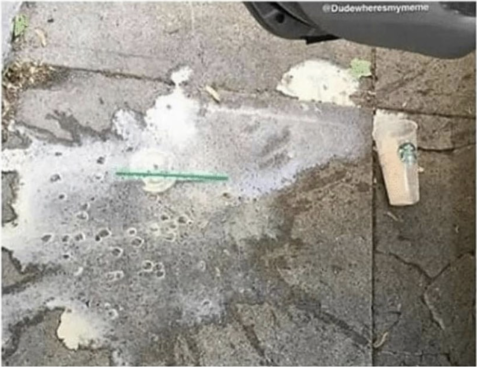

In [141]:
cnt = cv2.findContours(crop_mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cnt = imutils.grab_contours(cnt)

largest_contour = max(cnt, key=lambda x:cv2.contourArea(x))

bounding_rect = cv2.boundingRect(largest_contour)

cropped_image = img[bounding_rect[1]: bounding_rect[1]+bounding_rect[3],
                bounding_rect[0]:bounding_rect[0]+bounding_rect[2]]

showImage(cropped_image)